In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set random seed 
RSEED = 100

palette = sns.color_palette('Paired', 10)


In [152]:
data = pd.read_csv('train5_000_000.csv',nrows=5_000_000,)

In [153]:
data.shape

(1000000, 8)

In [134]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [135]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [136]:
data.isnull().sum()

fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [137]:
data = data.dropna()
data = data.reset_index(drop=True)
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [151]:
data.shape

(999517, 8)

In [138]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.347953,-72.526699,39.929040,-72.527860,39.919954,1.684941
std,9.821790,12.057778,7.626087,11.324494,8.201418,1.323907
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


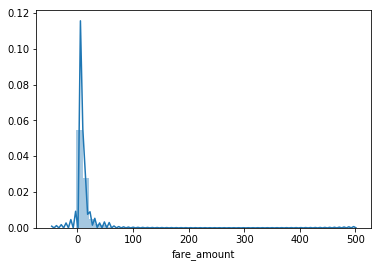

In [139]:
sns.distplot(data['fare_amount'])

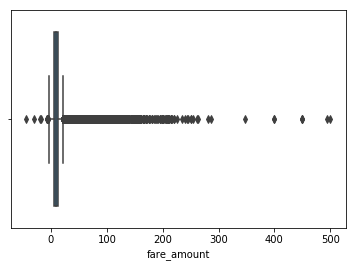

In [140]:
sns.boxplot(data['fare_amount'])

## Data Cleaning and Exploration

In [141]:
[q1,q3] = data['fare_amount'].quantile([0.25,0.75])
min_fare = q1-1.5*(q3-q1)
max_fare = q3+1.5*(q3-q1)
print(min_fare,max_fare)

-3.75 22.25


In [142]:
print('Number of data points equal or less than 0 : ',sum(data['fare_amount']<=0))
print('Number of data points equal or less than 0 : ',sum(data['fare_amount']>=22.5))

Number of data points equal or less than 0 :  67
Number of data points equal or less than 0 :  86411


It is not a good idea to use this method for removing outliers

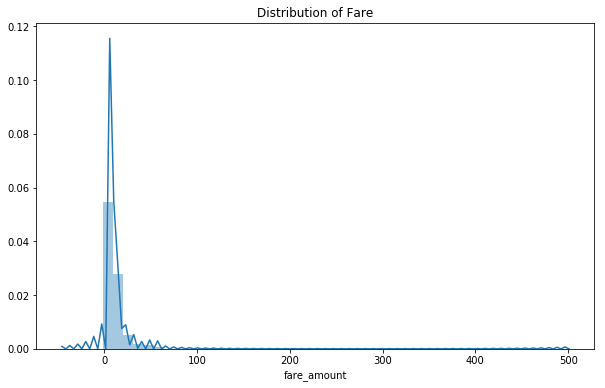

In [143]:
plt.figure(figsize = (10, 6))
sns.distplot(data['fare_amount']);
plt.title('Distribution of Fare');

Based on the data initial charge for each trip is $\textbf{2.5}$, therefore we should not have any values less than 2.5$.


In [144]:
sum(data['fare_amount']>100)/data.shape[0]

0.0003960039600396004

In [145]:
data = data[data['fare_amount'].between(2.5,100)]

In [146]:
data.shape

(999517, 7)

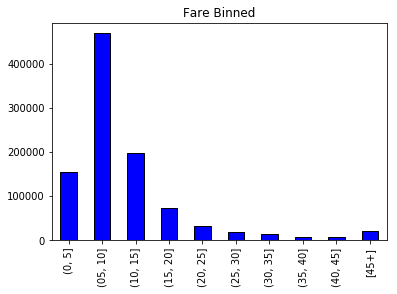

In [149]:
# Bin the fare and convert to string
data['fare-bin'] = pd.cut(data['fare_amount'], bins = list(range(0, 50, 5))).astype(str)

# Uppermost bin
data.loc[data['fare-bin'] == 'nan', 'fare-bin'] = '[45+]'

# Adjust bin so the sorting is correct
data.loc[data['fare-bin'] == '(5, 10]', 'fare-bin'] = '(05, 10]'

# Bar plot of value counts
data['fare-bin'].value_counts().sort_index().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Fare Binned');

(array([736050., 910537., 954711., 973689., 987708., 997347., 998370.,
        998961., 999332., 999517.]),
 array([  2.5 ,  12.25,  22.  ,  31.75,  41.5 ,  51.25,  61.  ,  70.75,
         80.5 ,  90.25, 100.  ]),
 <a list of 1 Patch objects>)

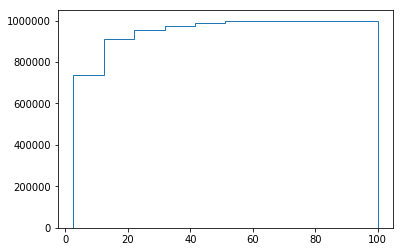

In [150]:
plt.hist(data['fare_amount'],cumulative=True,histtype='step')

## Other Outliers

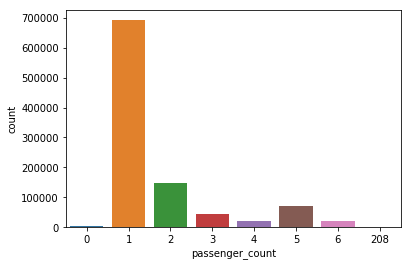

In [20]:
sns.countplot(data['passenger_count'])

In [21]:
data = data.loc[data['passenger_count'] < 6]

## Longitude and Latitude

In [22]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,978322.000000,978322.000000,978322.000000,978322.000000,978322.000000,978322.000000
mean,11.275876,-72.527511,39.930676,-72.531821,39.923380,1.591415
std,9.377641,12.064649,7.638198,11.305374,8.220117,1.155655
min,2.500000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992064,40.734962,-73.991382,40.734066,1.000000
50%,8.500000,-73.981798,40.752697,-73.980139,40.753170,1.000000
75%,12.500000,-73.967119,40.767145,-73.963677,40.768122,2.000000
max,100.000000,2522.271325,2621.628430,45.581619,1651.553433,5.000000


Latitudes range from 0 to 90 and longitudes range from 0 to 180.

New York City, NY, USA Geographic Information
:
Latitude	40.730610
Longitude	-73.935242 

In [23]:
for col in ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']:
    print(f'{col.capitalize():17}: 2.5% = {round(np.percentile(data[col], 2.5), 2):5} \t 97.5% = {round(np.percentile(data[col], 97.5), 2)}')

Pickup_latitude  : 2.5% = 40.64 	 97.5% = 40.8
Pickup_longitude : 2.5% = -74.01 	 97.5% = -73.78
Dropoff_latitude : 2.5% = 40.64 	 97.5% = 40.81
Dropoff_longitude: 2.5% = -74.01 	 97.5% = -73.78


In [24]:
# Remove latitude and longtiude outliers
data = data.loc[data['pickup_latitude'].between(40, 42)]
data = data.loc[data['pickup_longitude'].between(-75, -72)]
data = data.loc[data['dropoff_latitude'].between(40, 42)]
data = data.loc[data['dropoff_longitude'].between(-75, -72)]

print(f'New number of observations: {data.shape[0]}')

New number of observations: 958040


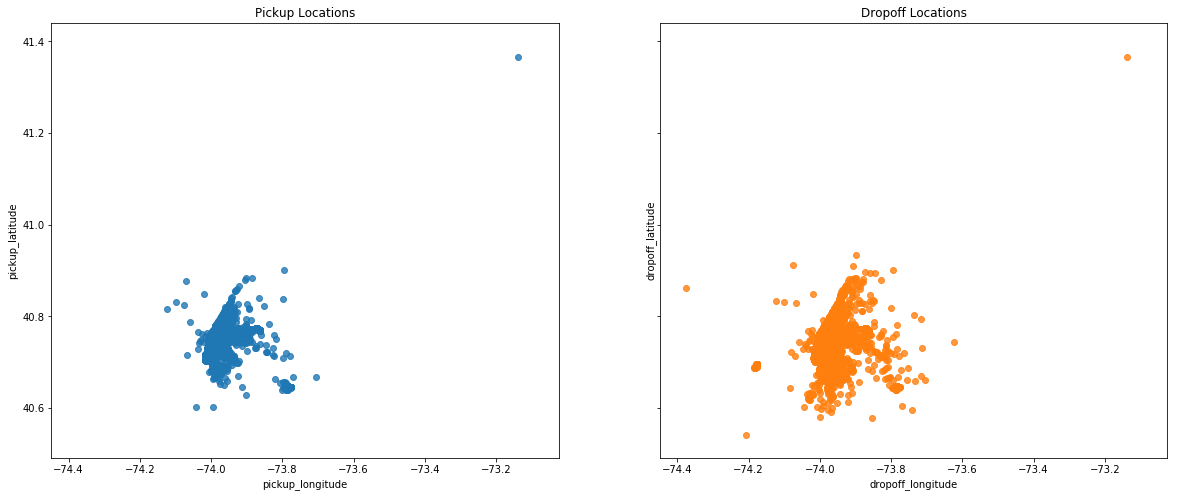

In [25]:
fig, axes = plt.subplots(1, 2, figsize = (20, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Plot Longitude (x) and Latitude (y)
sns.regplot('pickup_longitude', 'pickup_latitude', fit_reg = False, 
            data = data.sample(10000, random_state = RSEED), ax = axes[0]);
sns.regplot('dropoff_longitude', 'dropoff_latitude', fit_reg = False, 
            data = data.sample(10000, random_state = RSEED), ax = axes[1]);
axes[0].set_title('Pickup Locations')
axes[1].set_title('Dropoff Locations');

In [26]:
# load image of NYC map
# BB = (-74.5, -72.8, 40.5, 41.8)
# nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

# load extra image to zoom in on NYC
BB_zoom = (-74.1, -73.7, 40.6, 40.85)
nyc_map_zoom = plt.imread('https://github.com/MehrdadDS/Portfolio/blob/master/NYC-Taxi-Fares/nyc_-74.1_-73.7_40.6_40.85.png?raw=True')

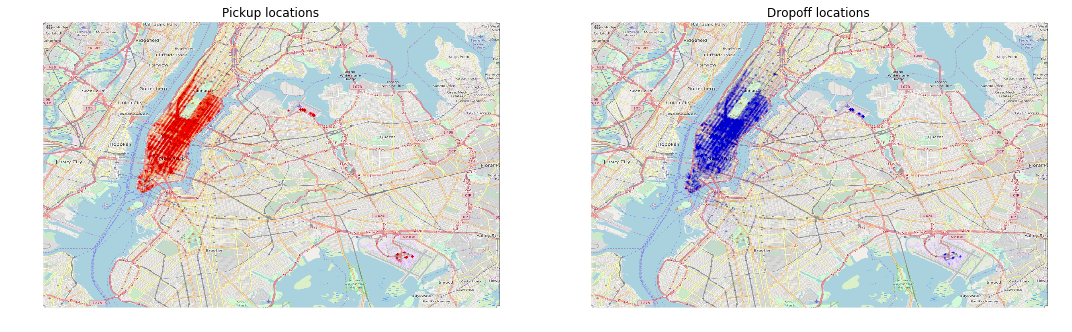

In [27]:
# this function will be used more often to plot data on the NYC map
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.1, color = False):
    fig, axs = plt.subplots(1, 2, figsize=(18, 22))
    
    # Set the zorder to 1 to plot on top of map
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].axis('off')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='b', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].axis('off')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)
    
# plot training data on map zoomed in
plot_on_map(data.sample(100_000, random_state = RSEED), 
            BB_zoom, nyc_map_zoom, s=0.06, alpha=0.04)

In [28]:
o = {'(0, 5]': 'r',
 '(15, 20]': 'b',
 '(05, 10]': 'y',
 '(10, 15]': 'c',
 '(20, 25]': 'm',
 '(30, 35]': 'w',
 '[45+]': 'g',
 '(25, 30]': 'k',
 '(35, 40]': 'k',
 '(40, 45]': 'k'}
#color_mapping = {fare_bin: o[i] for i, fare_bin in enumerate(data['fare-bin'].unique())}
data['color'] = data['fare-bin'].map(o)

In [29]:
plot_data = data.sample(1000)

In [30]:
plot_data = plot_data.reset_index(drop=True)

In [31]:
plot_data.color[0]

'y'

# Feature Engineering

In [32]:
data.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'fare-bin',
       'color'],
      dtype='object')

## Distance

In [33]:
# Absolute difference in latitude and longitude
data['abs_lat_diff'] = (data['dropoff_latitude'] - data['pickup_latitude']).abs()
data['abs_lon_diff'] = (data['dropoff_longitude'] - data['pickup_longitude']).abs()

c:\python37\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


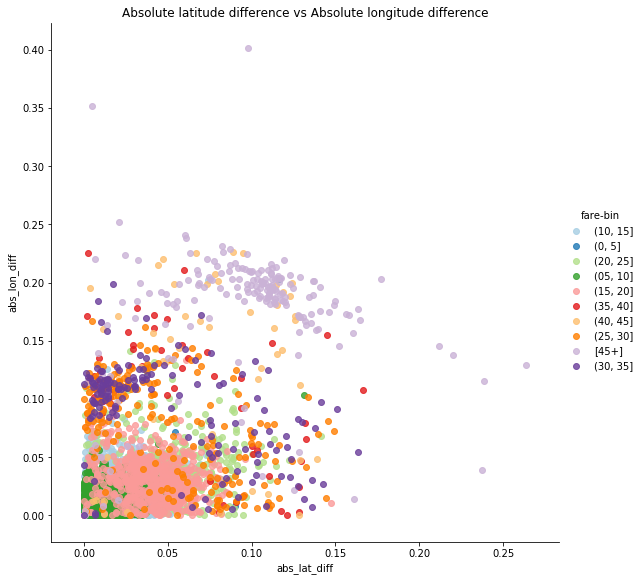

In [34]:
sns.lmplot('abs_lat_diff', 'abs_lon_diff', hue = 'fare-bin', size = 8, palette=palette,
           fit_reg = False, data = data.sample(10000, random_state=RSEED));
plt.title('Absolute latitude difference vs Absolute longitude difference');

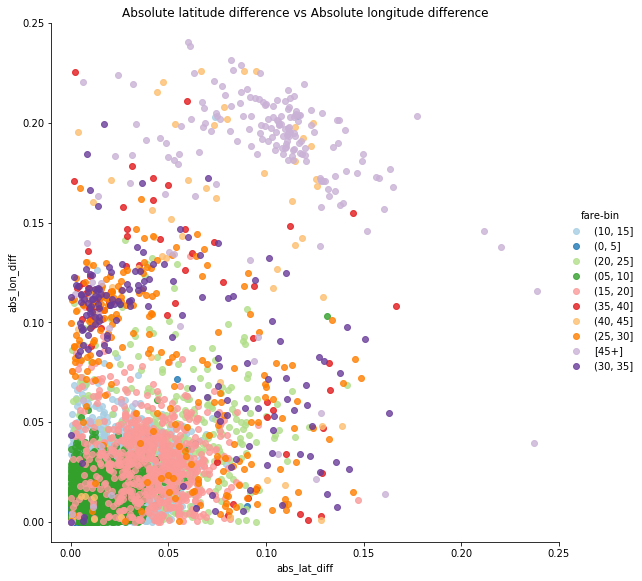

In [35]:
sns.lmplot('abs_lat_diff', 'abs_lon_diff', hue = 'fare-bin', size = 8, palette = palette,
           fit_reg = False, data = data.sample(10000, random_state=RSEED));

plt.xlim((-0.01, .25)); plt.ylim((-0.01, .25))
plt.title('Absolute latitude difference vs Absolute longitude difference');

It does seem that the rides with a larger absolute difference in both longitude and latitude tend to cost more. To capture both differences in a single variable, we can add up the two differences in latitude and longitude and also find the square root of the sum of differences squared. The former feature would be called the Manhattan distance - or l1 norm - and the latter is called the Euclidean distance - or l2 norm. Both of these distances are specific examples of the general Minkowski distance.



## Manhatan and Euclidean Distance

In [36]:
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)

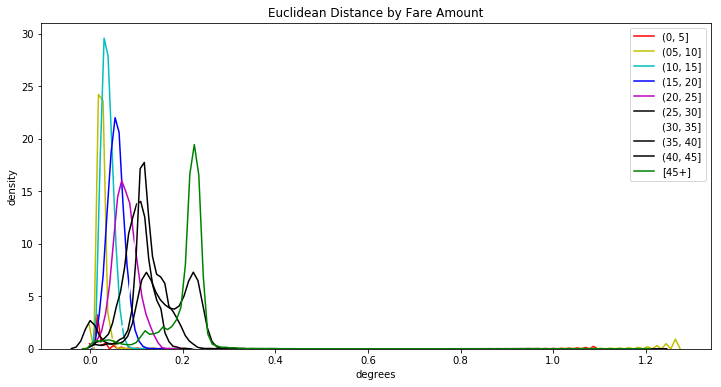

In [37]:
data['euclidean'] = minkowski_distance(data['pickup_longitude'], data['dropoff_longitude'],
                                       data['pickup_latitude'], data['dropoff_latitude'], 2)

# Calculate distribution by each fare bin
plt.figure(figsize = (12, 6))
for f, grouped in data.groupby('fare-bin'):
    sns.kdeplot(grouped['euclidean'], label = f'{f}', color = list(grouped['color'])[0]);

plt.xlabel('degrees'); plt.ylabel('density')
plt.title('Euclidean Distance by Fare Amount');

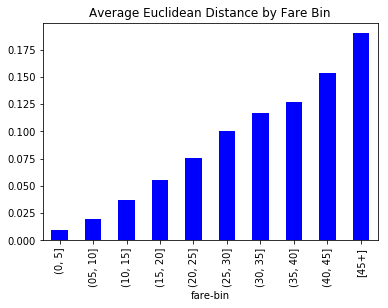

In [38]:
data.groupby('fare-bin')['euclidean'].mean().plot.bar(color = 'b');
plt.title('Average Euclidean Distance by Fare Bin');

There is a very clearly relationship between the fare bin and the average distance of the trip! This should give us confidence that this feature will be useful to a model.

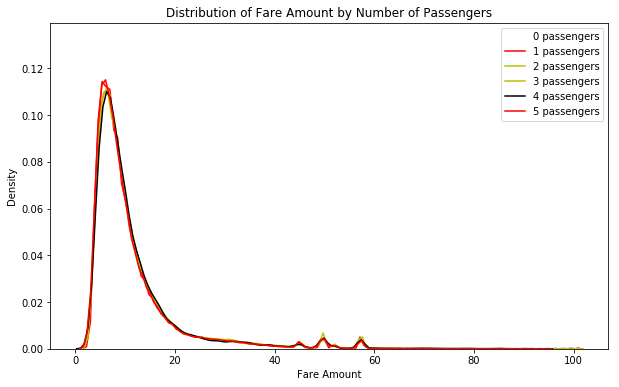

In [39]:
plt.figure(figsize = (10, 6))

for p, grouped in data.groupby('passenger_count'):
    sns.kdeplot(grouped['fare_amount'], label = f'{p} passengers', color = list(grouped['color'])[0]);
    
plt.xlabel('Fare Amount'); plt.ylabel('Density')
plt.title('Distribution of Fare Amount by Number of Passengers');

There does not appear to be much difference between the number of passengers. To get a more accurate picture, we can calculate the actual stats.

In [40]:
test = pd.read_csv('test.csv', parse_dates = ['pickup_datetime'])

# Create absolute differences
test['abs_lat_diff'] = (test['dropoff_latitude'] - test['pickup_latitude']).abs()
test['abs_lon_diff'] = (test['dropoff_longitude'] - test['pickup_longitude']).abs()

# Save the id for submission
test_id = list(test.pop('key'))

test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_lat_diff,abs_lon_diff
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,0.022133,0.023348
std,0.042774,0.033541,0.039072,0.035435,1.278747,0.025589,0.036719
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,0.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,0.007279,0.006354
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,0.014715,0.013123
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,0.028261,0.024557
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,0.633213,0.849168


Before we forget, we need to read in the test data and create the same features. The test data must have the same exact features as the training data used in the model.

We can't exclude any of the test data based on outliers, and we also shouldn't use the test data for filtering outliers in the training data. The test data should ideally only be used a single time, to test the performance of a trained model.

For the test data, we need to save the key column for making submissions.

In [41]:
test = pd.read_csv('test.csv', parse_dates = ['pickup_datetime'])

# Create absolute differences
test['abs_lat_diff'] = (test['dropoff_latitude'] - test['pickup_latitude']).abs()
test['abs_lon_diff'] = (test['dropoff_longitude'] - test['pickup_longitude']).abs()

# Save the id for submission
test_id = list(test.pop('key'))

test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_lat_diff,abs_lon_diff
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,0.022133,0.023348
std,0.042774,0.033541,0.039072,0.035435,1.278747,0.025589,0.036719
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,0.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,0.007279,0.006354
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,0.014715,0.013123
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,0.028261,0.024557
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,0.633213,0.849168


In [42]:
test['euclidean'] = minkowski_distance(test['pickup_longitude'], test['dropoff_longitude'],
                                       test['pickup_latitude'], test['dropoff_latitude'], 2)

In [43]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_lat_diff,abs_lon_diff,euclidean
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,0.019970,0.008110,0.021554
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,0.019817,0.012024,0.023180
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.005121,0.002870,0.005870
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,0.016172,0.009288,0.018649
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,0.045348,0.022519,0.050631


## Calculate Distance between points using Haversine distance

To calculate a more realistic distance between the pickup and dropoff, we can use the Haversine distance. This is the Great Circle distance, representing the shortest distance along the surface of the Earth connecting two points taking into account the fact that the Earth is a sphere (or so I'm told). It's not the best measure because the taxis do not travel along lines, but it's more accurate in terms of an absolute distance than the Manhattan and Euclidean distances made from the absolute latitude and longitude difference. The Manhattan and Euclidean distances are relative and do not take into account the spherical shape of the Earth.

(We could convert the latitude and longitude into cartesian coordinates after establishing an origin. One option would be to use the center of the Earth and another would be to use the average of all coordinates in the data as an origin. Then, once we converted the points in this coordinate system, we could use the Manhattan and Euclidean formulas to find distances between points in kilometers. These are all approximations because we can't find the actual street distance.)



In [44]:
# Radius of the earth in kilometers
R = 6378

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    
    
    source: https://stackoverflow.com/a/29546836

    """
    # Convert latitude and longitude to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Find the differences
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Apply the formula 
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    # Calculate the angle (in radians)
    c = 2 * np.arcsin(np.sqrt(a))
    # Convert to kilometers
    km = R * c
    
    return km

In [45]:
data['haversine'] =  haversine_np(data['pickup_longitude'], data['pickup_latitude'],
                         data['dropoff_longitude'], data['dropoff_latitude']) 

test['haversine'] = haversine_np(test['pickup_longitude'], test['pickup_latitude'],
                         test['dropoff_longitude'], test['dropoff_latitude'])

In [46]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare-bin,color,abs_lat_diff,abs_lon_diff,euclidean,haversine
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,"(0, 5]",r,0.009041,0.002701,0.009436,1.031896
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,"(15, 20]",b,0.070701,0.036780,0.079696,8.459418
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,"(05, 10]",y,0.010708,0.008504,0.013674,1.391052
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,"(05, 10]",y,0.024949,0.004437,0.025340,2.802346
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,"(05, 10]",y,0.015754,0.011440,0.019470,2.001353


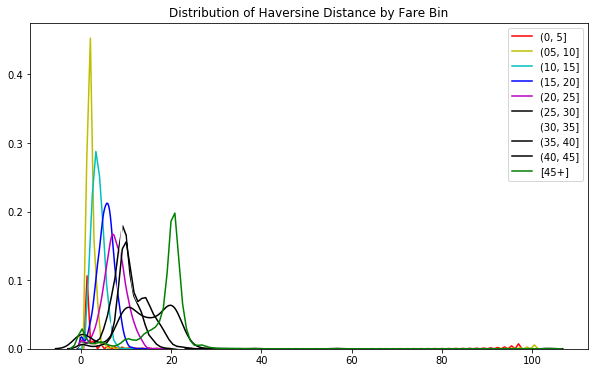

In [47]:
subset = data.sample(100000, random_state=RSEED)

plt.figure(figsize = (10, 6))

for f, grouped in subset.groupby('fare-bin'):
    sns.kdeplot(grouped['haversine'], label = f'{f}', color = list(grouped['color'])[0]);
    
plt.title('Distribution of Haversine Distance by Fare Bin');

It does seem there is a significant difference here! The larger haversine distances tend to have larger fares as expected. The differences seem to be close to those returned from the Euclidean and Manhattan calculations.

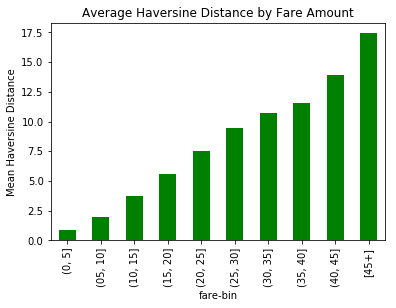

In [48]:
data.groupby('fare-bin')['haversine'].mean().sort_index().plot.bar(color = 'g');
plt.title('Average Haversine Distance by Fare Amount');
plt.ylabel('Mean Haversine Distance');

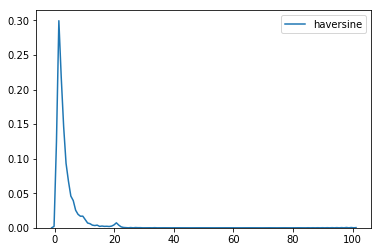

In [49]:
sns.kdeplot(test['haversine']);

The test distribution seems to be similar to the training distribution.

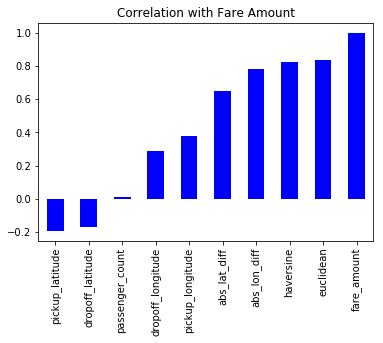

In [50]:
corrs = data.corr()
corrs['fare_amount'].sort_values().plot.bar(color = 'b');
plt.title('Correlation with Fare Amount');

All the measures of distance have a positive linear correlation with the fare, indicating that as they increase, the fare tends to increase as well.

The correlation coefficient measures the strength and direction of a linear relationship. Because the linear relationship with the target variable is so strong, we may be able to just use a linear model (regression) to accurately predict the fares.

# Machine Learning

Now that we have built a few potentially useful features, we can use them for machine learning: training an algorithm to predict the target from the features. We'll start off with a basic model - Linear Regression - only using a few features and then move on to a more complex models and more features. There is reason to believe that for this problem, even a simple linear model will perform well because of the strong linear correlation of the distances with the fare. We generally want to use the simplest - and hence most interpretable - model that is above an accuracy threshold (dependent on the application) so if a linear model does the job, there's no need to use a highly complex ensemble model. It's a best practice to start out with a simple model for just this reason!

## First Model: Linear Regression

The first model we'll make is a simple linear regression using 3 features: the abs_lat_diff, abs_lon_diff, and passenger_count. This is meant to serve as a baseline for us to beat.

It's good to start with a simple model because it will give you a baseline. Also, if a simple model works well enough, then there may be no need for more complex models. If a linear regression will get the job done, then you don't need a neural network!

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression()

## Create Training and Validation Set

We'll want to create a training and separate validation set to assess our model. Ideally, we only use the test set once, to evaluate the final model. We can make a validation set with 1 million observations to estimate our performance.

We stratify the split using the fare-bin. This ensures that the training and validation set have the same distribution of fare bins. This is important for imbalanced classification problems, but it can also be useful for regression problems so we don't end up with a lot of outliers in terms of the target in either the validation or training set. (We have to stratify based on a discrete variable which is why we use the fare bin.)


In [52]:
# Split data
X_train, X_valid, y_train, y_valid = train_test_split(data, np.array(data['fare_amount']), 
                                                      stratify = data['fare-bin'],
                                                      random_state = RSEED, test_size = 50_000)

In [53]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare-bin,color,abs_lat_diff,abs_lon_diff,euclidean,haversine
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,"(0, 5]",r,0.009041,0.002701,0.009436,1.031896
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,"(15, 20]",b,0.070701,0.036780,0.079696,8.459418
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,"(05, 10]",y,0.010708,0.008504,0.013674,1.391052
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,"(05, 10]",y,0.024949,0.004437,0.025340,2.802346
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,"(05, 10]",y,0.015754,0.011440,0.019470,2.001353


In [55]:
#lr.fit(X_train[['abs_lat_diff', 'abs_lon_diff', 'passenger_count']], y_train)
lr.fit(X_train[['euclidean', 'passenger_count']], y_train)


print('Intercept', round(lr.intercept_, 4))
print('abs_lat_diff coef: ', round(lr.coef_[0], 4), 
      '\tabs_lon_diff coef:', round(lr.coef_[1], 4),
      #'\tpassenger_count coef:', round(lr.coef_[2], 4))
     )

Intercept 4.6297
abs_lat_diff coef:  194.1356 	abs_lon_diff coef: 0.0178


In all cases, the coefficient is positive, indicating a larger value of the variable corresponds to a larger fare according to the model. We can say that according to a linear model, for every 1 more passenger, the fare increases by $0.02. The intercept indicates the fare that would be predicted if there is no latitude or longitude difference and the passenger count is 0.

### Score Model

Here we use the validation set for assessing the model. We'll use two metrics:

* Root mean squared error: the metric used by the competition
* Mean absolute percentage error: the average percentage error of the predictions

I like using the mean absolute percentage error (MAPE) because it's often more interpretable

In [56]:
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

def metrics(train_pred, valid_pred, y_train, y_valid):
    """Calculate metrics:
       Root mean squared error and mean absolute percentage error"""
    
    # Root mean squared error
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, valid_pred))
    
    # Calculate absolute percentage error
    train_ape = abs((y_train - train_pred) / y_train)
    valid_ape = abs((y_valid - valid_pred) / y_valid)
    
    # Account for y values of 0
    train_ape[train_ape == np.inf] = 0
    train_ape[train_ape == -np.inf] = 0
    valid_ape[valid_ape == np.inf] = 0
    valid_ape[valid_ape == -np.inf] = 0
    
    train_mape = 100 * np.mean(train_ape)
    valid_mape = 100 * np.mean(valid_ape)
    
    return train_rmse, valid_rmse, train_mape, valid_mape

def evaluate(model, features, X_train, X_valid, y_train, y_valid):
    """Mean absolute percentage error"""
    
    # Make predictions
    train_pred = model.predict(X_train[features])
    valid_pred = model.predict(X_valid[features])
    
    # Get metrics
    train_rmse, valid_rmse, train_mape, valid_mape = metrics(train_pred, valid_pred,
                                                             y_train, y_valid)
    
    print(f'Training:   rmse = {round(train_rmse, 2)} \t mape = {round(train_mape, 2)}')
    print(f'Validation: rmse = {round(valid_rmse, 2)} \t mape = {round(valid_mape, 2)}')

In [57]:
evaluate(lr, ['euclidean', 'passenger_count'], 
        X_train, X_valid, y_train, y_valid)

Training:   rmse = 5.13 	 mape = 25.28
Validation: rmse = 5.06 	 mape = 25.16


## Naive Baseline

To make sure that machine learning is even applicable to the task, we should compare these predictions to a naive guess. For a regression task, this can be as simple as the average value of the target in the training data.

In [58]:
train_mean = y_train.mean()


# Create list of the same prediction for every observation
train_preds = [train_mean for _ in range(len(y_train))]
valid_preds = [train_mean for _ in range(len(y_valid))]

tr, vr, tm, vm = metrics(train_preds, valid_preds, y_train, y_valid)

print(f'Baseline Training:   rmse = {round(tr, 2)} \t mape = {round(tm, 2)}')
print(f'Baseline Validation: rmse = {round(vr, 2)} \t mape = {round(vm, 2)}')

Baseline Training:   rmse = 9.33 	 mape = 64.83
Baseline Validation: rmse = 9.4 	 mape = 64.67


According to the naive baseline, our machine learning solution is effective! We are able to reduce the percentage error by about half and generate much better predictions than using no machine learning. This should give us confidence we are on the right track.

### Make a submission

In order to make a submission to Kaggle, we have to make predictions on the test data. Below we make the predictions and save them to a csv file in the format specified by the competition

In [59]:
preds = lr.predict(test[['euclidean', 'passenger_count']])

sub = pd.DataFrame({'key': test_id, 'fare_amount': preds})
sub.to_csv('sub_lr_simple.csv', index = False)

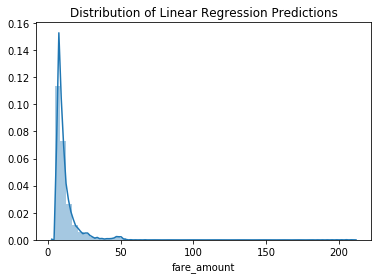

In [60]:
sns.distplot(sub['fare_amount'])
plt.title('Distribution of Linear Regression Predictions');

The predicted distribution appears reasonable. Because the competition uses root mean squared error as the metric, any predictions that are far off will have an outsized effect on the error. Let's look at predictions that were greater than $100.

In [61]:
test.loc[sub[sub['fare_amount'] > 100].index]


,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_lat_diff,abs_lon_diff,euclidean,haversine
4080,2010-06-11 13:37:21,-73.137393,41.366138,-73.984145,40.732925,1,0.633213,0.846752,1.057330,100.105909
5887,2010-07-04 16:44:11,-73.137393,41.366138,-73.982629,40.767240,1,0.598898,0.845236,1.035907,97.347817
8529,2009-11-25 19:32:52,-73.137393,41.366138,-73.986561,40.757966,3,0.608172,0.849168,1.044490,98.300306


In [62]:
sub[sub['fare_amount'] > 100]

,key,fare_amount
4080,2010-06-11 13:37:21.0000004,209.912863
5887,2010-07-04 16:44:11.0000002,205.753756
8529,2009-11-25 19:32:52.0000001,207.455592


These three predictions that are all over $100 don't appear to be completely unexpected given the large abs_lat_diff and abs_lon_diff. We'll have to take a look at these predictions for other models and see if they agree.

In [63]:
simple_over_100 = list(sub[sub['fare_amount'] > 100].index)
sub['fare_amount'].describe()

count    9914.000000
mean       11.482512
std         8.243501
min         4.647434
25%         7.232871
50%         9.012946
75%        12.452070
max       209.912863
Name: fare_amount, dtype: float64

As a linear model, the linear regression is not flexible at all. In other words, it has a high bias because it assumes a linear relationship between the predictor variables (features) and the response (target). The final formula produced by the model is interpretable, but that doesn't mean it's right! In machine learning, we often have to make a tradeoff between model interpretability and model accuracy. In this case the linear regression does well, but as we'll see, a more complex model does even better.

### Use More Features

While the first model scored well relative to the baseline, there is much room for improvement. As a first step, let's use one of the other features we created, the haversine distance.

In [65]:
lr.fit(X_train[['haversine', 'abs_lat_diff', 'passenger_count']], y_train)

evaluate(lr, ['haversine', 'abs_lat_diff', 'passenger_count'], 
         X_train, X_valid, y_train, y_valid)

Training:   rmse = 5.07 	 mape = 25.43
Validation: rmse = 5.01 	 mape = 25.31


### Collinear Features

One thing we do want to be careful about is highly correlated, known as collinear, features. These can decrease the generalization performance of the model and lead to less interpretable models. Many of our features are already highly correlated as shown in the heatmap below. This plots the Pearson Correlation Coefficient for each pair of variables.

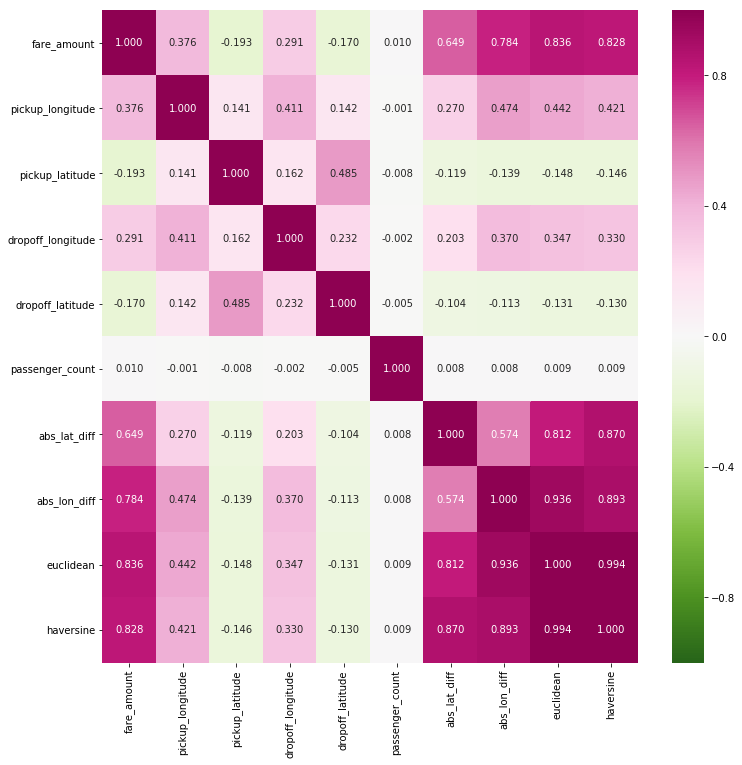

In [66]:

corrs = data.corr()

plt.figure(figsize = (12, 12))
sns.heatmap(corrs, annot = True, vmin = -1, vmax = 1, fmt = '.3f', cmap=plt.cm.PiYG_r);

## Upgraded Model

When we want to improve performance, we generally have a few options:

* Get more data - either more observations or more variables
* Engineer more / better features
* Perform feature selection to remove irrelevant features
* Try a more complex model
* Perform hyperparameter tuning of the selected model
We already saw that including another feature could improve perfomance. For now let's move past the features and focus on the model (we'll come back to features later).

The simple linear regression has no hyperparameters to optimize (no settings to tune) so we'll try approach 4. If the more complex model does well, we can use it for testing additional features or performing feature selection

## Non-Linear Model

In [67]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest
random_forest = RandomForestRegressor(n_estimators = 20, max_depth = 20, 
                                      max_features = None, oob_score = True, 
                                      bootstrap = True, verbose = 1, n_jobs = -1)

# Train on data
random_forest.fit(X_train[['haversine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count']], y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   33.9s finished
c:\python37\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(max_depth=20, max_features=None, n_estimators=20,
                      n_jobs=-1, oob_score=True, verbose=1)

In [68]:
evaluate(random_forest, ['haversine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count'],
         X_train, X_valid, y_train, y_valid)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    1.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


Training:   rmse = 3.19 	 mape = 19.0
Validation: rmse = 4.36 	 mape = 22.21


[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished


In [69]:
preds = random_forest.predict(test[['haversine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count']])

sub = pd.DataFrame({'key': test_id, 'fare_amount': preds})
sub.to_csv('sub_rf_simple.csv', index = False)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished


The random forest does much better than the simple linear regression. This indicates that the problem is not completely linear, or at least is not linear in terms of the features we have constructed. From here going forward, we'll use the same random forest model because of the increased performance.

Given the gap between the training and the validation score, we can see that our model is overfitting to the training data. This is one of the most common problems in machine learning and is usually addressed either by training with more data, or adjusting the hyperparameters of the model. This leads to another recommendation for improvement:

Potential Improvement 4: Try searching for better random forest model hyperparameters. You may find Scikit-Learn's RandomizedSearchCV a useful tool.
I'll provide some starter code for hyperparameter optimization later in the notebook.

Next we can make predictions with the random forest for uploading to the competition.

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished


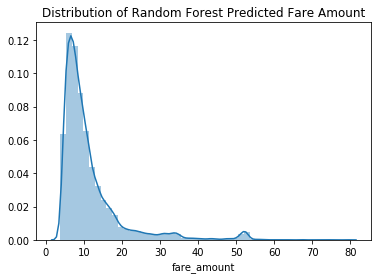

In [70]:
preds = random_forest.predict(test[['haversine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count']])

sub = pd.DataFrame({'key': test_id, 'fare_amount': preds})
sub.to_csv('sub_rf_simple.csv', index = False)

sns.distplot(sub['fare_amount'])
plt.title('Distribution of Random Forest Predicted Fare Amount');

This time we don't see any extreme predictions as we saw with the first linear regression. The random forest tends to not produce outlying predictions because the voting of the trees means that any single tree that estimates an extreme value will be balanced by the other predictions.

Let's look at the 3 predictions the original simple linear regression estimated as over $100.

In [71]:
sub.loc[simple_over_100]


,key,fare_amount
4080,2010-06-11 13:37:21.0000004,8.8900
5887,2010-07-04 16:44:11.0000002,10.3550
8529,2009-11-25 19:32:52.0000001,10.1735


Wow! The random forest and the linear regression significantly disagree. This brings up another point: one option we have for modeling is to combine the predictions of multiple models. Oftentimes, averaging the predictions of multiple models will result in better performance than either model by itself. Just for fun, let's try averaging the validation predictions of both models.

## Average Models

We'll assess the validation performance of a simple averaging of the linear regression and random forest.

In [72]:
lr_tpred = lr.predict(X_train[['haversine', 'abs_lon_diff', 'passenger_count']])
rf_tpred = random_forest.predict(X_train[['haversine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count']])

lr_pred = lr.predict(X_valid[['haversine',  'abs_lon_diff', 'passenger_count']])
rf_pred = random_forest.predict(X_valid[['haversine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count']])

# Average predictions
train_pred = (lr_tpred + rf_tpred) / 2
valid_pred = (lr_pred + rf_pred) / 2

tr, vr, tm, vm = metrics(train_pred, valid_pred, y_train, y_valid)

print(f'Combined Training:   rmse = {round(tr, 2)} \t mape = {round(tm, 2)}')
print(f'Combined Validation: rmse = {round(vr, 2)} \t mape = {round(vm, 2)}')

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    2.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished


Combined Training:   rmse = 4.2 	 mape = 22.71
Combined Validation: rmse = 4.77 	 mape = 24.11


In [73]:
pred1  = random_forest.predict(test[['haversine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count']]) 
pred2 = lr.predict(test[['haversine',  'abs_lon_diff', 'passenger_count']])
preds = ( pred1 + pred2 )/2



sub = pd.DataFrame({'key': test_id, 'fare_amount': preds})
sub.to_csv('sub_meanRFandLR_simple.csv', index = False)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished


For this problem, the random forest by itself is slightly better. However, I'd encourage you to experiment with a range of models given that the best model depends on the dataset.



### More Features

Now that we've decided on the Random Forest as our model, we can try using additional features. Let's see what happens when we use 8 of the features for training. The function below trains the random forest and assesses it on the validation data.

In [118]:
def model_rf(X_train, X_valid, y_train, y_valid, test, features,
             model = RandomForestRegressor(n_estimators = 20, max_depth = 20,
                                           n_jobs = -1),
             return_model = False):
    """Train and evaluate the random forest using the given set of features."""
    
    # Train
    model.fit(X_train[features], y_train)
    
    # Validation
    evaluate(model, features, X_train, X_valid, y_train, y_valid)
    
    # Make predictions on test and generate submission dataframe
    preds = model.predict(test[features])
    sub = pd.DataFrame({'key': test_id, 'fare_amount': preds})
    
    # Extract feature importances
    feature_importances = pd.DataFrame({'feature': features,
                                        'importance': model.feature_importances_}).\
                           sort_values('importance', ascending = False).set_index('feature')
    
    if return_model:
        return sub, feature_importances, model
    
    return sub, feature_importances

In [78]:
# Evaluate using 8 features
sub, fi = model_rf(X_train, X_valid, y_train, y_valid, test, 
                   features = ['abs_lat_diff', 'abs_lon_diff', 'haversine', 'passenger_count',
                               'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])

Training:   rmse = 2.74 	 mape = 17.2
Validation: rmse = 3.83 	 mape = 20.38


In [79]:
# Evaluate using 8 features
sub, fi = model_rf(X_train, X_valid, y_train, y_valid, test, 
                   features = ['abs_lat_diff', 'abs_lon_diff', 'haversine', 'passenger_count',
                               'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])

Training:   rmse = 2.75 	 mape = 17.24
Validation: rmse = 3.85 	 mape = 20.47


It appears that using more features helps the model! We can look at the feature importances to see which the model considers "most relevant".

## Feature Importances

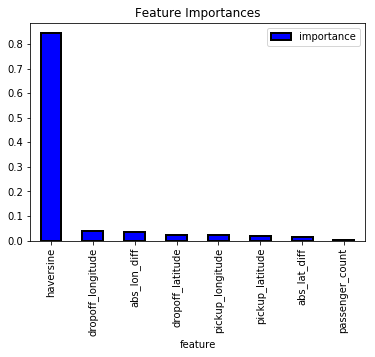

In [80]:
fi.plot.bar(color = 'b', edgecolor = 'k', linewidth = 2);
plt.title('Feature Importances');

The haversine distance is by far the most important with the other features showing considerably less relevance to the model. This suggests that distance is key, and we might want to find a more accurate way of calculating distances.

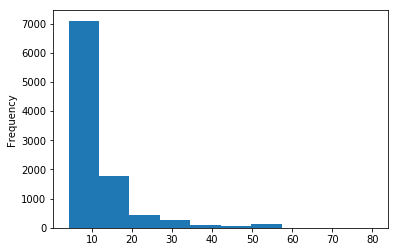

In [81]:
sub.to_csv('sub_rf_8_features.csv', index = False)
sub['fare_amount'].plot.hist();


## Additional Feature Engineering

We saw that adding more features improves the performance of the model. A natural progression is therefore to use even more features! We have not made any use of the pickup_datetime which provides the precise moment of pickup and that's where we'll turn our attention to next.

# Extract Datetime Information

In [82]:
import re

def extract_dateinfo(df, date_col, drop=True, time=False, 
                     start_ref = pd.datetime(1900, 1, 1),
                     extra_attr = False):
    """
    Extract Date (and time) Information from a DataFrame
    Adapted from: https://github.com/fastai/fastai/blob/master/fastai/structured.py
    """
    df = df.copy()
    
    # Extract the field
    fld = df[date_col]
    
    # Check the time
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    # Convert to datetime if not already
    if not np.issubdtype(fld_dtype, np.datetime64):
        df[date_col] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    

    # Prefix for new columns
    pre = re.sub('[Dd]ate', '', date_col)
    pre = re.sub('[Tt]ime', '', pre)
    
    # Basic attributes
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Days_in_month', 'is_leap_year']
    
    # Additional attributes
    if extra_attr:
        attr = attr + ['Is_month_end', 'Is_month_start', 'Is_quarter_end', 
                       'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    
    # If time is specified, extract time information
    if time: 
        attr = attr + ['Hour', 'Minute', 'Second']
        
    # Iterate through each attribute
    for n in attr: 
        df[pre + n] = getattr(fld.dt, n.lower())
        
    # Calculate days in year
    df[pre + 'Days_in_year'] = df[pre + 'is_leap_year'] + 365
        
    if time:
        # Add fractional time of day (0 - 1) units of day
        df[pre + 'frac_day'] = ((df[pre + 'Hour']) + (df[pre + 'Minute'] / 60) + (df[pre + 'Second'] / 60 / 60)) / 24
        
        # Add fractional time of week (0 - 1) units of week
        df[pre + 'frac_week'] = (df[pre + 'Dayofweek'] + df[pre + 'frac_day']) / 7
    
        # Add fractional time of month (0 - 1) units of month
        df[pre + 'frac_month'] = (df[pre + 'Day'] + (df[pre + 'frac_day'])) / (df[pre + 'Days_in_month'] +  1)
        
        # Add fractional time of year (0 - 1) units of year
        df[pre + 'frac_year'] = (df[pre + 'Dayofyear'] + df[pre + 'frac_day']) / (df[pre + 'Days_in_year'] + 1)
        
    # Add seconds since start of reference
    df[pre + 'Elapsed'] = (fld - start_ref).dt.total_seconds()
    
    if drop: 
        df = df.drop(date_col, axis=1)
        
    return df

In [83]:
print(data['pickup_datetime'].min())
print(test['pickup_datetime'].min())

2009-01-01 00:00:46+00:00
2009-01-01 11:04:24


For a reference time, we can use the start of the training data. This means that the Elapsed measure will be the time since the beginning of the observations.

In [84]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

In [85]:
data = extract_dateinfo(data, 'pickup_datetime', drop = False, 
                         time = True, start_ref = data['pickup_datetime'].min())
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare-bin,color,abs_lat_diff,...,pickup_is_leap_year,pickup_Hour,pickup_Minute,pickup_Second,pickup_Days_in_year,pickup_frac_day,pickup_frac_week,pickup_frac_month,pickup_frac_year,pickup_Elapsed
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,"(0, 5]",r,0.009041,...,False,17,26,21,365,0.726632,0.103805,0.507311,0.455537,14318735.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,"(15, 20]",b,0.070701,...,False,16,52,16,365,0.702963,0.243280,0.178218,0.015582,31942290.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,"(05, 10]",y,0.010708,...,False,0,35,0,365,0.024306,0.432044,0.563260,0.628482,82859654.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,"(05, 10]",y,0.024949,...,True,4,30,42,366,0.187986,0.741141,0.683483,0.305689,104214596.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,"(05, 10]",y,0.015754,...,False,7,51,0,365,0.327083,0.189583,0.291471,0.186686,37353014.0


In [87]:
test = extract_dateinfo(test, 'pickup_datetime', drop = False, 
                         time = True, start_ref = data['pickup_datetime'].min())
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_lat_diff,abs_lon_diff,euclidean,haversine,...,pickup_is_leap_year,pickup_Hour,pickup_Minute,pickup_Second,pickup_Days_in_year,pickup_frac_day,pickup_frac_week,pickup_frac_month,pickup_frac_year,pickup_Elapsed
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,0.019970,0.008110,0.021554,2.325812,...,False,13,8,24,365,0.547500,0.221071,0.860859,0.075266,191596058.0
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,0.019817,0.012024,0.023180,2.428018,...,False,13,8,24,365,0.547500,0.221071,0.860859,0.075266,191596058.0
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.005121,0.002870,0.005870,0.619308,...,False,11,53,44,365,0.495648,0.785093,0.265489,0.769114,87306778.0
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,0.016172,0.009288,0.018649,1.963187,...,True,21,12,12,366,0.883472,0.840496,0.058859,0.917939,123628286.0
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,0.045348,0.022519,0.050631,5.393220,...,True,21,12,12,366,0.883472,0.840496,0.058859,0.917939,123628286.0


# Explore Time Variables


We now have a ton of time-variables to explore! First, let's ask the question if fares have increased over time. To do this, we can plot the time_elapsed versus the fare.

c:\python37\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


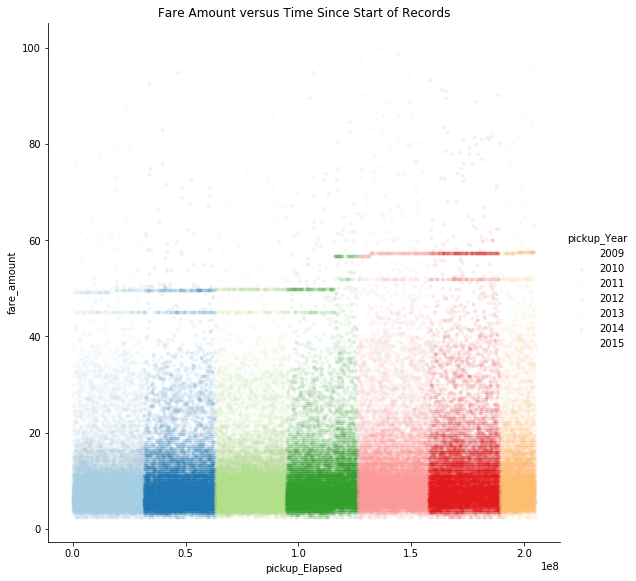

In [88]:
sns.lmplot('pickup_Elapsed', 'fare_amount', hue = 'pickup_Year', palette=palette, size = 8,
           scatter_kws= {'alpha': 0.05}, markers = '.', fit_reg = False,
           data = data.sample(100000, random_state=RSEED));
plt.title('Fare Amount versus Time Since Start of Records');

There appears to be a minor increase in prices over time which might be expected taking into account inflation. Let's look at the average fare amount by the hour of day.

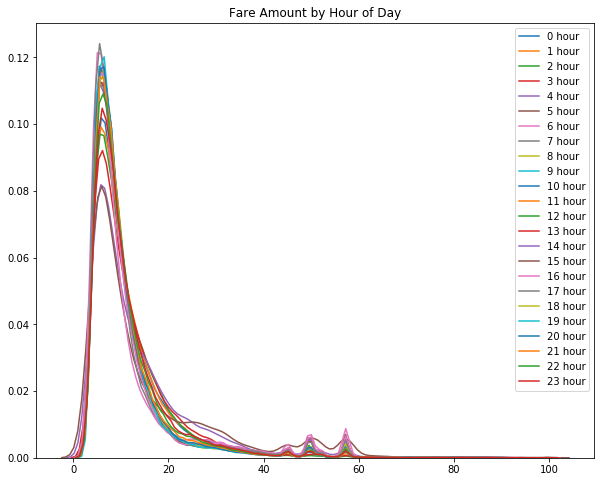

In [89]:
plt.figure(figsize = (10, 8))
for h, grouped in data.groupby('pickup_Hour'):
    sns.kdeplot(grouped['fare_amount'], label = f'{h} hour');
plt.title('Fare Amount by Hour of Day');

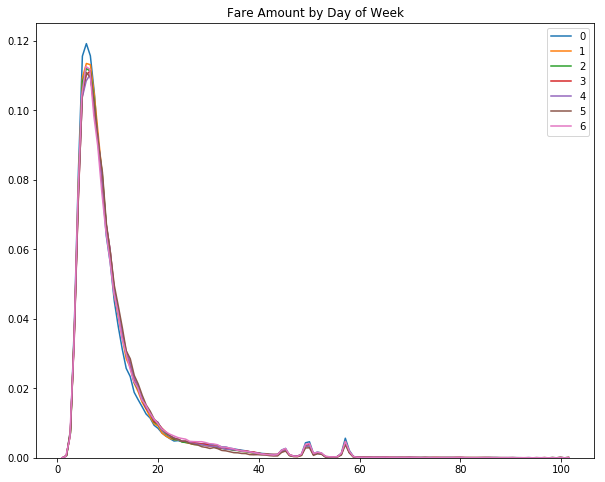

In [90]:
plt.figure(figsize = (10, 8))
for d, grouped in data.groupby('pickup_Dayofweek'):
    sns.kdeplot(grouped['fare_amount'], label = f'{d}')
plt.title('Fare Amount by Day of Week');

Both of these plots do not seem to show much difference between the different times.



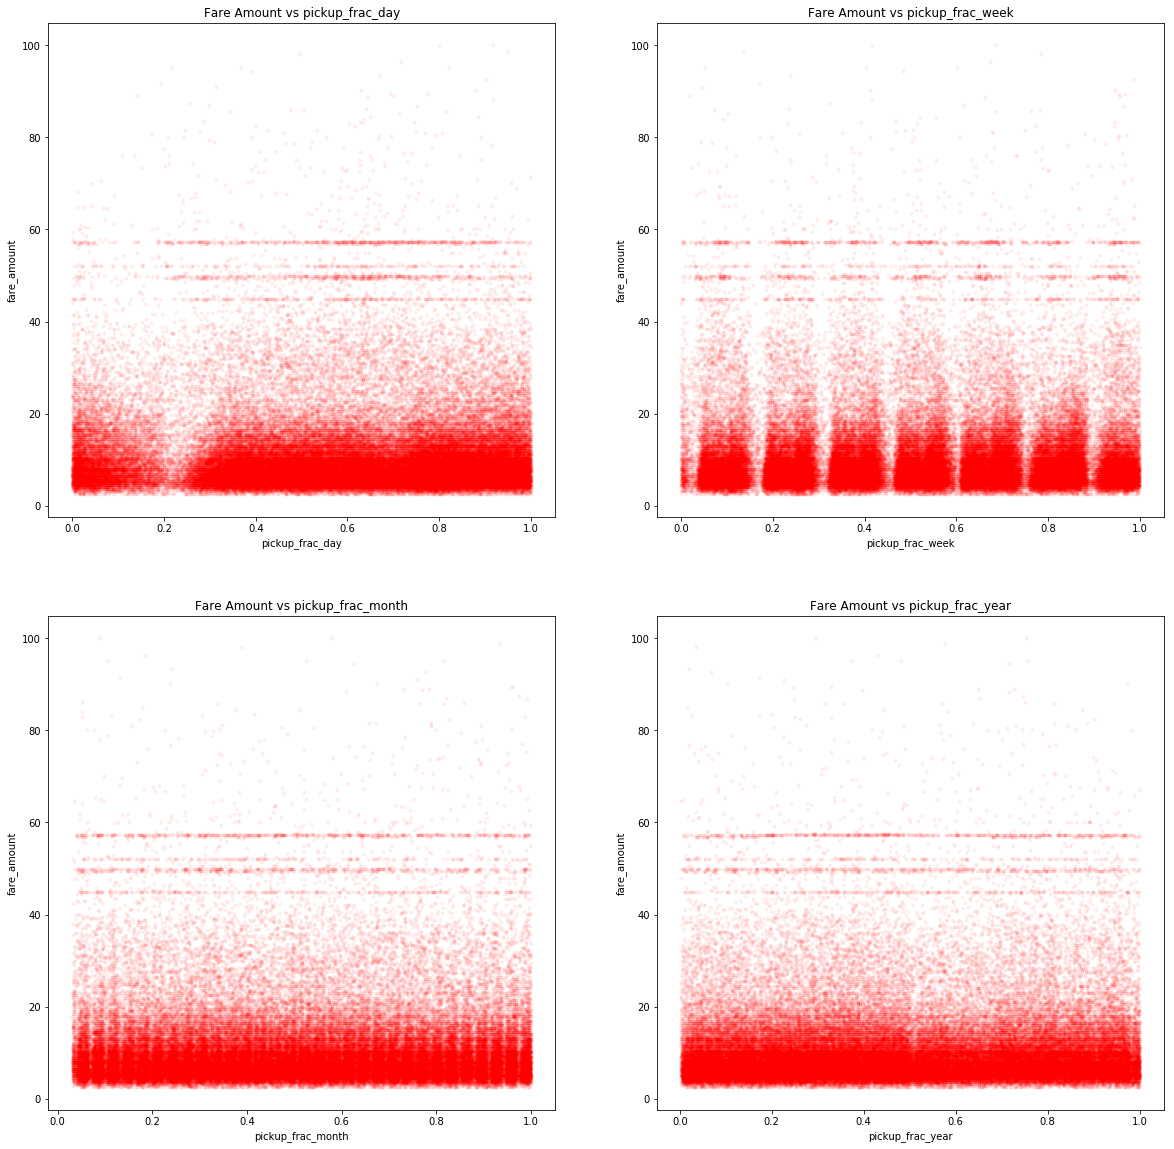

In [91]:
fig, axes = plt.subplots(2, 2, figsize = (20, 20))
axes = axes.flatten()

# Plot each of the fractional times
for i, d in enumerate(['day', 'week', 'month', 'year']):
    ax = axes[i]
    sns.regplot(f'pickup_frac_{d}', 'fare_amount', 
                data = data.sample(100000, random_state = RSEED), 
                fit_reg = False, scatter_kws = {'alpha': 0.05}, marker = '.', ax = ax,
                color = 'r')
    
    ax.set_title(f'Fare Amount vs pickup_frac_{d}')

None of these graphs are very decisive. One interesting thing to note is the horizontal bars at different fare amounts. This suggests there may be certain routes that always have the same fare amount. We explored the fare distribution earlier, but it might be a good idea to revisit the abnormalities in the fares.

In [92]:
fare_counts = data.groupby('fare_amount')['haversine'].agg(['count', pd.Series.nunique]).sort_values('count', ascending = False)
fare_counts.head()

,count,nunique
fare_amount,,
6.5,46654,46198.0
4.5,39542,38960.0
8.5,35869,35592.0
5.3,28442,28055.0
5.7,28293,27937.0


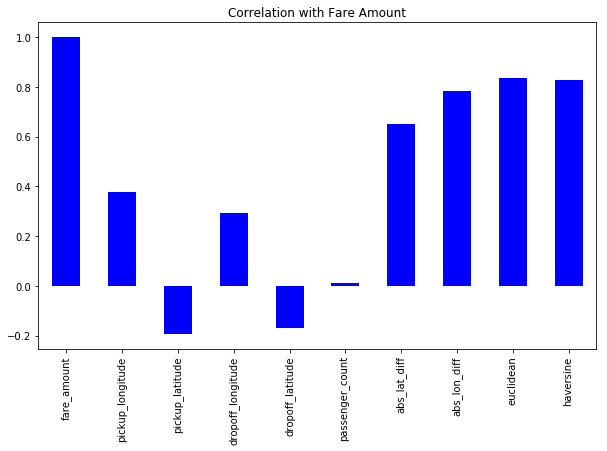

In [93]:
# corrs = data.corr()
corrs['fare_amount'].plot.bar(color = 'b', figsize = (10, 6));
plt.title('Correlation with Fare Amount');

It seems the most useful time variables may be the Year or Elapsed because most of the time features have a small correlation with the target. The Elapsed correlation is positive indicating that fares have tended to increase over time.

In [94]:
X_train, X_valid, y_train, y_valid = train_test_split(data, np.array(data['fare_amount']), 
                                                      stratify = data['fare-bin'],
                                                      random_state = RSEED, test_size = 300_000)

For the time features, we'll use the fractional measurements for the day, week, and year, as well as the time elapsed since the beginning of the records. We'll keep the other same features as the previous training run. (This gives us a total of 12 features).

In [125]:
time_features = ['pickup_frac_day', 'pickup_frac_week', 'pickup_frac_year', 'pickup_Elapsed']

features = ['abs_lat_diff', 'abs_lon_diff', 'haversine', 'passenger_count',
            'pickup_latitude', 'pickup_longitude', 
            'dropoff_latitude', 'dropoff_longitude'] + time_features

In [126]:
features

['abs_lat_diff',
 'abs_lon_diff',
 'haversine',
 'passenger_count',
 'pickup_latitude',
 'pickup_longitude',
 'dropoff_latitude',
 'dropoff_longitude',
 'pickup_frac_day',
 'pickup_frac_week',
 'pickup_frac_year',
 'pickup_Elapsed']

model = rs.best_estimator_


In [128]:
# Test using the features
sub, fi = model_rf(X_train, X_valid, y_train, y_valid, test, 
                   features = features)

Training:   rmse = 2.26 	 mape = 14.06
Validation: rmse = 3.49 	 mape = 17.89


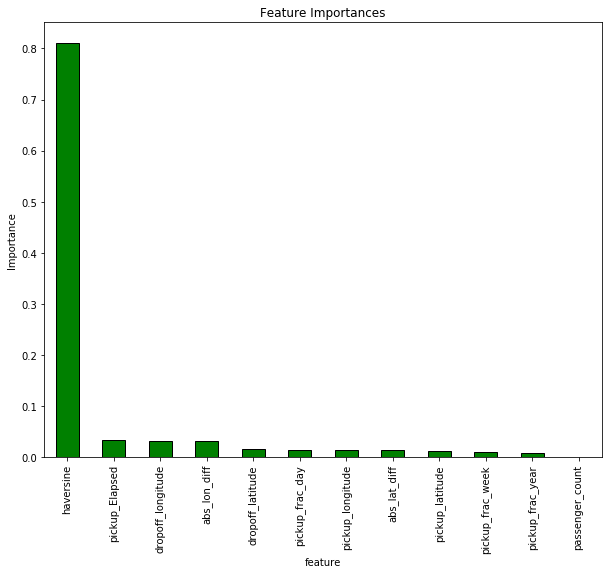

In [129]:
plt.figure(figsize = (10, 8))
fi['importance'].plot.bar(color = 'g', edgecolor = 'k');
plt.ylabel('Importance'); plt.title('Feature Importances');

In [130]:
# Save submission
sub.to_csv('sub_rf_frac_time.csv', index = False)


In [103]:
features = list(data.columns)

for f in ['pickup_datetime', 'fare_amount', 'fare-bin', 'color']:
    features.remove(f)
    
len(features)

26

In [104]:
# Test using all the features
sub, fi, random_forest = model_rf(X_train, X_valid, y_train, y_valid, test, 
                                  features = features, return_model = True)

Training:   rmse = 2.26 	 mape = 14.16
Validation: rmse = 3.49 	 mape = 17.97


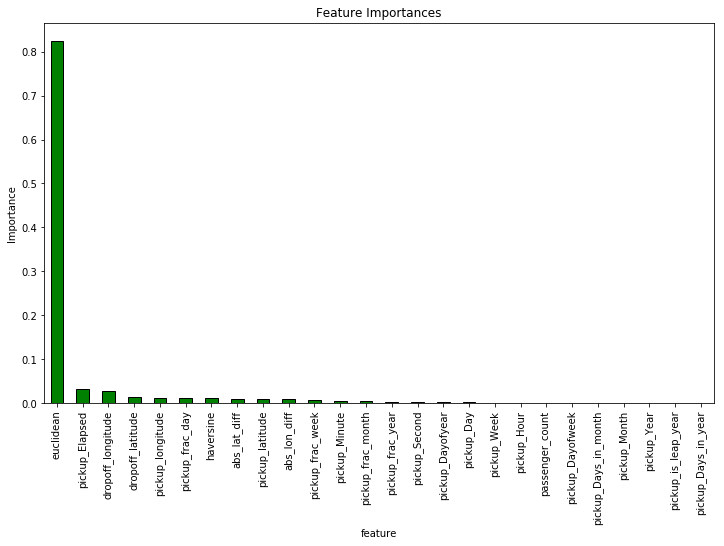

In [105]:
plt.figure(figsize = (12, 7))
fi['importance'].plot.bar(color = 'g', edgecolor = 'k');
plt.ylabel('Importance'); plt.title('Feature Importances');

In [106]:
sub.to_csv('sub_rf_all_features.csv', index = False)


# Hyperparameter Tuning

With the random forest, there are a ton of model hyperparamters to optimize. The process of hyperparameter optimization means finding the best hyperparameters for an algorithm on a specific dataset. The ideal values changes across data sets so we have to perform this step on every new dataset. I like to think of hyperparameter optimization as finding the best settings for a machine learning model.

In [107]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 100).astype(int),
    'max_depth': [None] + list(np.linspace(5, 30).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestRegressor(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'neg_mean_absolute_error', cv = 3, 
                        n_iter = 100, verbose = 1, random_state=RSEED)

In [108]:
tune_data = data.sample(100_000, random_state = RSEED)

# Select features
time_features = ['pickup_frac_day', 'pickup_frac_week', 'pickup_frac_year', 'pickup_Elapsed']
Fitting 3 folds for each of 100 candidates, totalling 300 fits

features = ['abs_lat_diff', 'abs_lon_diff', 'haversine', 'passenger_count',
            'pickup_latitude', 'pickup_longitude', 
            'dropoff_latitude', 'dropoff_longitude'] + time_features

rs.fit(tune_data[features], np.array(tune_data['fare_amount']))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 27.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=100),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 5, 6, 6, 7, 7, 8,
                                                      8, 9, 9, 10, 10, 11, 11,
                                                      12, 12, 13, 13, 14, 14,
                                                      15, 15, 16, 16, 17, 17,
                                                      18, 18, 19, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None,..., 10,
                                               

In [109]:
model = rs.best_estimator_
print(f'The best parameters were {rs.best_params_} with a negative mae of {rs.best_score_}')

The best parameters were {'n_estimators': 55, 'min_samples_split': 2, 'max_leaf_nodes': 47, 'max_features': 0.6, 'max_depth': 26, 'bootstrap': True} with a negative mae of -1.9987353988925136


In [110]:
model.n_jobs = -1
model.fit(X_train[features], y_train)

evaluate(model, features, X_train, X_valid, y_train, y_valid)

Training:   rmse = 3.77 	 mape = 20.97
Validation: rmse = 3.77 	 mape = 20.92


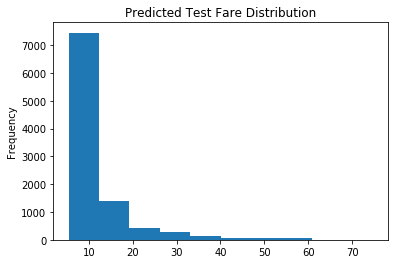

In [111]:
pred = np.array(model.predict(test[features])).reshape((-1))
sub = pd.DataFrame({'key': test_id, 'fare_amount': pred})
sub.to_csv('sub_rf_tuned.csv', index = False)
sub['fare_amount'].plot.hist();
plt.title('Predicted Test Fare Distribution');

# Xgboost